# Agglomerative Hierarchical Method

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("samples2.csv", index_col=0)
df

,X,Y,Z
ID0,6.964692,2.861393,2.268515
ID1,5.513148,7.194690,4.231065
ID2,9.807642,6.848297,4.809319
ID3,3.921175,3.431780,7.290497
ID4,4.385722,0.596779,3.980443


In [5]:
df.iloc[:,1].tolist()

[2.8613933495037944,
 7.194689697855631,
 6.848297385848633,
 3.4317801615086942,
 0.5967789660956835]

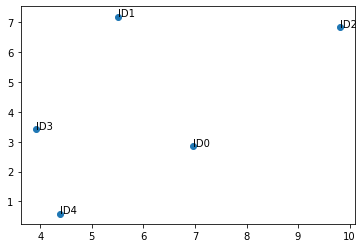

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
#we are plotting the points in 2 dimensions just to give you an idea of their positions in the space
#BUT those are just 2 out of the 3 (X,Y,Z) original dimensions 

fig, ax = plt.subplots()
ax.scatter(df.iloc[:,0], df.iloc[:,1])

labels=["ID0","ID1","ID2","ID3","ID4"]

for i in range(len(df)):
    ax.annotate(labels[i], (df.iloc[i,0], df.iloc[i,1]))

# Agglomerative Clustering using SciPy

In [7]:
from scipy.spatial.distance import pdist, squareform

labels = df.index.values #how to get the data frame index as an array
row_dist = pd.DataFrame(squareform(pdist(df,metric='euclidean')),columns=labels,index=labels)
row_dist


,ID0,ID1,ID2,ID3,ID4
ID0,0.000000,4.973534,5.516653,5.899885,3.835396
ID1,4.973534,0.000000,4.347073,5.104311,6.698233
ID2,5.516653,4.347073,0.000000,7.244262,8.316594
ID3,5.899885,5.104311,7.244262,0.000000,4.382864
ID4,3.835396,6.698233,8.316594,4.382864,0.000000


Matrix of Distances between all pairs of observations

In [8]:
#apply the complete linkage to agglomerate the observations
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(df.values, method='complete', metric='euclidean')
row_clusters

#  method
#     - ward minimizes the variance of the clusters being merged.
#     - average uses the average of the distances of each observation of the two sets.
#     - complete or maximum linkage uses the maximum distances between all observations of the two sets.
#     - single uses the minimum of the distances between all observations of the two sets.


array([[0.        , 4.        , 3.83539555, 2.        ],
       [1.        , 2.        , 4.34707339, 2.        ],
       [3.        , 5.        , 5.89988504, 3.        ],
       [6.        , 7.        , 8.31659367, 5.        ]])

In [9]:
row_clusters = pd.DataFrame(row_clusters, columns =['row label 1', 'row label 2', 'distance', 'n of items in each clust'])
row_clusters

,row label 1,row label 2,distance,n of items in each clust
0,0.0,4.0,3.835396,2.0
1,1.0,2.0,4.347073,2.0
2,3.0,5.0,5.899885,3.0
3,6.0,7.0,8.316594,5.0


Matrix of linkages

In [10]:
row_clusters.iloc[[0]]

,row label 1,row label 2,distance,n of items in each clust
0,0.0,4.0,3.835396,2.0


In its first iteration the linkage algorithm decided to merge the two clusters (original samples here) 
with indices 0 and 4, as they had a distance of 3.83539555. 

This created a cluster with a total of 2 samples.

In [11]:
row_clusters.iloc[[1]]

,row label 1,row label 2,distance,n of items in each clust
1,1.0,2.0,4.347073,2.0


In the second iteration the algorithm decided to merge the clusters (original samples here as well) 
with indices 1 and 2, which had a distance of 4.34707339. 

This again formed another cluster with a total of 2 samples.

The indices of the clusters until now correspond to our samples. 
Remember that we had a total of 5 samples, so indices 0 to 4. 

Let's have a look at the rest of iterations:

In [12]:
row_clusters

,row label 1,row label 2,distance,n of items in each clust
0,0.0,4.0,3.835396,2.0
1,1.0,2.0,4.347073,2.0
2,3.0,5.0,5.899885,3.0
3,6.0,7.0,8.316594,5.0


We can observe that until iteration 1 the algorithm only directly merged original samples. 
We can also observe the monotonic increase of the distance.


In iteration 2 the algorithm decided to merge the original sample 3 with cluster index 5. 
If you paid attention the 5 should astonish you as we only have original sample indices 0 to 4 for our 5 samples. 
All indices idx >= len(X) actually refer to the cluster formed in row_clusters[idx - len(X)].

This means that while idx 4 corresponds to X[4] that idx 5 corresponds to the cluster formed in row_clusters[0],idx 6 to row_clusters[1], 7 to row_clusters[2], ...

Hence, the merge iteration 2 merged sample 3 to our samples 0 and 4 that were previously merged in iteration 0.

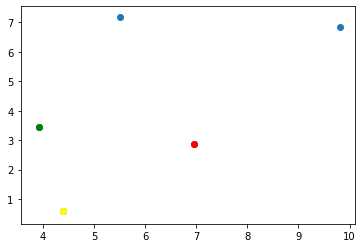

In [14]:
from matplotlib import pyplot as plt
plt.scatter(df.iloc[:,0], df.iloc[:,1])
#we are plotting the points in 2 dimensions just to give you an idea of their positions in the space
#BUT those are just 2 out of the 3 (X,Y,Z) original dimensions 

plt.scatter(df.iloc[0,0], df.iloc[0,1], c='red')#plot a red id0
plt.scatter(df.iloc[3,0], df.iloc[3,1], c='green')#plot a green id3
plt.scatter(df.iloc[4,0], df.iloc[4,1], c='yellow')#plot a yellow id4
plt.show()

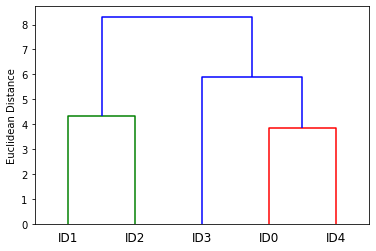

In [15]:
# Plot the corresponding dendrogram
from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram(row_clusters, labels = labels)
plt.ylabel('Euclidean Distance')
plt.show()

In [17]:
import pandas as pd
X = pd.read_csv("sample1.csv", header=None)

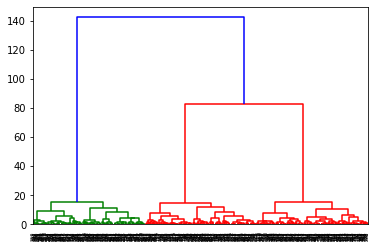

In [18]:
# Plot the corresponding dendrogram
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
dend = dendrogram(linkage(X, method='ward'))


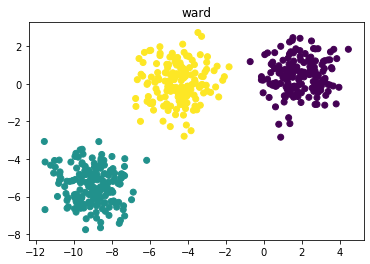

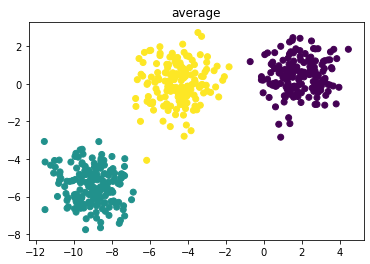

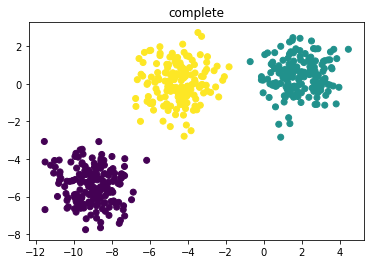

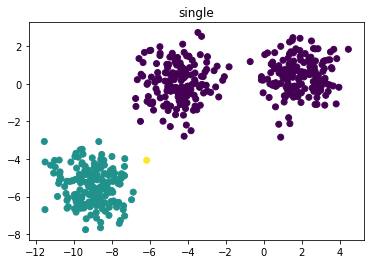

In [19]:
from sklearn.cluster import AgglomerativeClustering

# n_clustersint The number of clusters 
# affinitystring:  “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”.
#     If linkage is “ward”, only “euclidean” is accepted. If “precomputed”, a distance matrix is needed 
#
#     - ward minimizes the variance of the clusters being merged.
#     - average uses the average of the distances of each observation of the two sets.
#     - complete or maximum linkage uses the maximum distances between all observations of the two sets.
#     - single uses the minimum of the distances between all observations of the two sets.


set=X

for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=3)
    clustering.fit(set)

    plt.scatter(set[0], set[1], c=clustering.labels_)
    plt.title(linkage)
    plt.show()
    


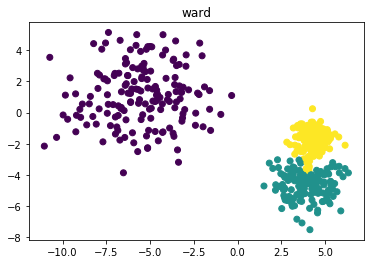

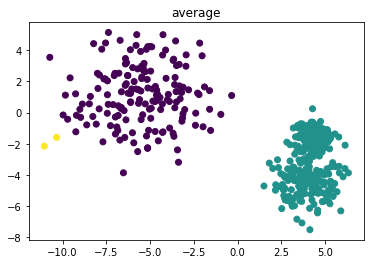

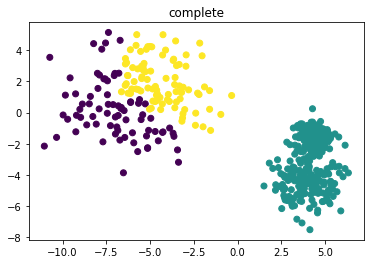

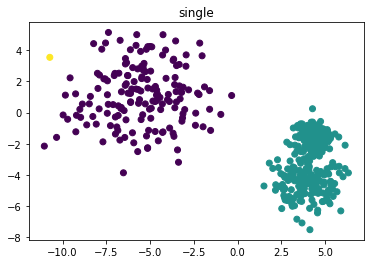

In [20]:
import pandas as pd
X2 = pd.read_csv("sample2.csv", header=None)

set= X2.iloc[:,0:2]

for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=3)
    clustering.fit(set)

    plt.scatter(set[0], set[1], c=clustering.labels_)
    plt.title(linkage)
    plt.show()

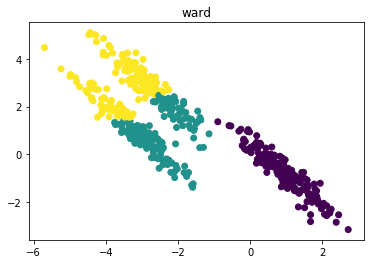

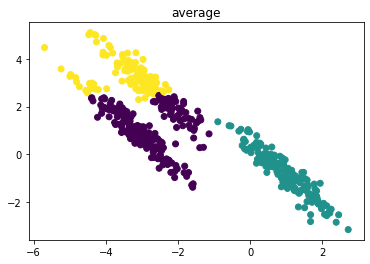

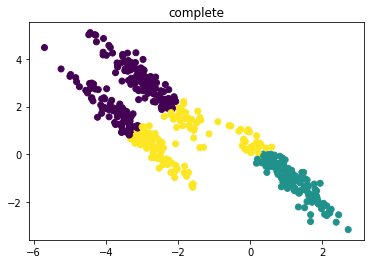

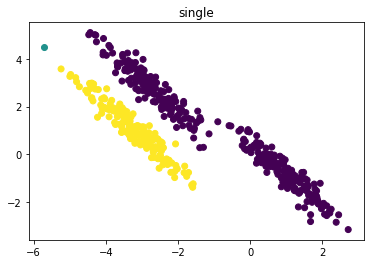

In [21]:
import numpy as np

# Anisotropicly distributed data
transformation = [[0.6, -0.6], [-0.4, 0.8]]
# transformation=PDP^-1 D=diag(1.2,0,2) and P=[[0.07107, -0.83205], [-0.707107, -0.5547]]
# the transformation expands in the direction [0.710,-0.707] and shrinks in the direction  [-0.832, -0.5547]

X3 = pd.DataFrame(np.dot(X, transformation))

set=X3

for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=3)
    clustering.fit(set)

    plt.scatter(set[0], set[1], c=clustering.labels_)
    plt.title(linkage)
    plt.show()
    


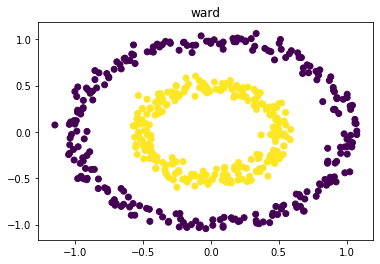

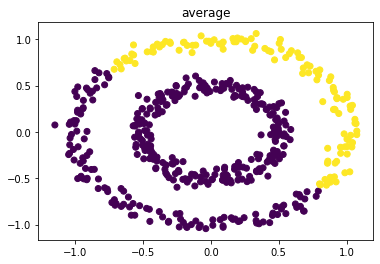

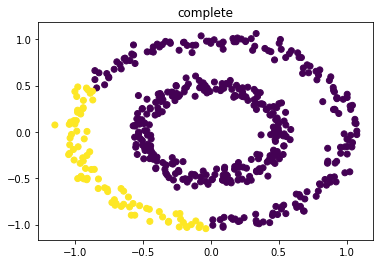

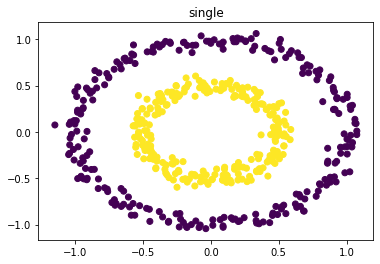

In [22]:
import pandas as pd
X4 = pd.read_csv("sample4.csv", header=None)

set= X4
for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=2)
    clustering.fit(set)

    plt.scatter(set[0], set[1], c=clustering.labels_)
    plt.title(linkage)
    plt.show()